In this tutorial, we will use ProSRS algorithm to solve a general user-defined optimization problem. For the purpose of demonstration, we will use a simple 2D function corrupted with Gaussian random noise:
<img width="354" alt="demo_function" src="https://user-images.githubusercontent.com/8780593/53434522-71f49500-39bc-11e9-81e1-a0f2121dbb37.png">
where $\epsilon$ is normally distributed with mean 0 and standard deviation 0.1. It is easy to see that the global mininum of the underlying true function $\mathbb{E}[f(x,y)]$ is 0, obtained at the location (0, 0). However, now let's pretend that we know neither the underlying expectation function nor the minimum, as it is true in most real optimization problems. We will try to solve the problem by only accessing the evaluations of the noisy function $f$.

In [1]:
import prosrs
import numpy as np

In [2]:
# Define the function that will be optimized over
def f(x):
    """
    Args:
        
        x (1d array): Function input.
    
    Returns:
    
        y (float): Function output.
    """
    sd = 0.1
    y = x[0]**2+x[1]**2+np.random.normal(0, sd)
    return y

In [3]:
# Define optimization problem
name = 'Demo' # problem name
domain = [(-5., 5.), (-5., 5.)] # function domain
x_var = ['x', 'y'] # independent variable names
y_var = 'z' # response variable name
prob = prosrs.Problem(domain, func=f, name=name, x_var=x_var, y_var=y_var) # create problem object
print(prob) # show problem info

Optimization problem:
- Name: Demo
- Dimension: 2
- Domain: {'x': (-5.0, 5.0), 'y': (-5.0, 5.0)}
- Response variable: 'z'
- Global minimum: unknown
- Global minimum locations: unknown


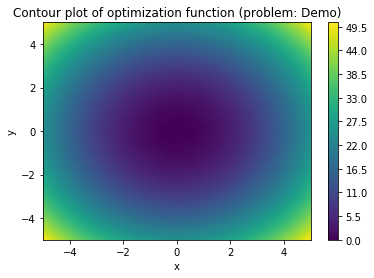

In [4]:
prob.visualize(n_samples=1000, plot='contour') # contour plot of (noisy) function

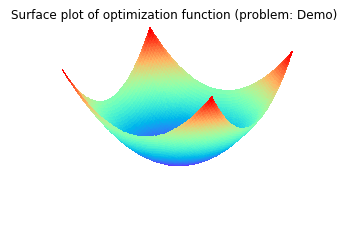

In [5]:
prob.visualize(n_samples=5000, plot='surface') # surface plot of (noisy) function

In [6]:
# Set up optimization
n_worker = 12 # number of workers
n_cycle = 1 # number of optimization cycles
optimizer = prosrs.Optimizer(prob, n_worker, n_cycle=n_cycle) # create optimizer object

In [7]:
# Check optimization configuration to make sure everything looks fine
optimizer.show(select=['config'])

Optimization configuration:
- Number of workers: 12
- Termination criterion: stop after completing 1 optimization cycles
- Resuming from the last run?  No
- Output directory: 'out'


In [8]:
# Run optimization
optimizer.run()


Start running ProSRS algorithm ...

Iteration 1:
Proposing new points (DOE) .......... Done (time took: 1.19e-05 sec).
Evaluating proposed points .......... Done (time took: 8.86e-02 sec).
Updating optimizer state .......... Done (time took: 1.23e-03 sec).

Iteration 2:
Building RBF regression model .......... Done (time took: 2.73e-02 sec).
Proposing new points .......... Done (time took: 3.67e-03 sec).
Evaluating proposed points .......... Done (time took: 1.44e-02 sec).
Updating optimizer state .......... Done (time took: 5.53e-04 sec).

Iteration 3:
Building RBF regression model .......... Done (time took: 2.68e-02 sec).
Proposing new points .......... Done (time took: 7.16e-03 sec).
Evaluating proposed points .......... Done (time took: 1.99e-02 sec).
Updating optimizer state .......... Done (time took: 6.19e-04 sec).

Iteration 4:
Building RBF regression model .......... Done (time took: 3.17e-02 sec).
Proposing new points .......... Done (time took: 5.48e-03 sec).
Evaluating pr

Building RBF regression model .......... Done (time took: 2.98e-01 sec).
Proposing new points .......... Done (time took: 2.04e-02 sec).
Evaluating proposed points .......... Done (time took: 1.66e-02 sec).
Updating optimizer state .......... Done (time took: 5.02e-03 sec).
Restart for the next iteration!

Finished running ProSRS algorithm.


In [9]:
# Obtain top points from the optimization, sorted by function values
top_pt, top_val, _ = optimizer.top_pts(n_top=10) # top 10 points
print('Top 10 points:')
print(top_pt)
print('')
print('Function values of the top 10 points:')
print(top_val)

Top 10 points:
[[ 0.06754086  0.03681851]
 [ 0.04737677  0.0319884 ]
 [ 0.02347837 -0.06182263]
 [ 0.00052515  0.03982749]
 [-0.0307424   0.02575343]
 [-0.00406293 -0.09925711]
 [ 0.03182444  0.00636367]
 [ 0.10896812  0.01691067]
 [-0.10627356 -0.01337421]
 [ 0.1619168   0.00381127]]

Function values of the top 10 points:
[-0.26743771 -0.20097492 -0.20045504 -0.18971094 -0.17518444 -0.16525029
 -0.15778627 -0.15293584 -0.1370441  -0.13664956]


In [10]:
# Use 'show' method to display top points
optimizer.show(select=['result'], n_top=10)

Optimization result:
- Best point:
  x = 0.0675409, y = 0.0368185
- Best (noisy) value:
  z = -0.267438
- Top 10 points sorted by (noisy) function values (Column 3):
               x            y           z
       0.0675409    0.0368185   -0.267438
       0.0473768    0.0319884   -0.200975
       0.0234784   -0.0618226   -0.200455
     0.000525153    0.0398275   -0.189711
      -0.0307424    0.0257534   -0.175184
     -0.00406293   -0.0992571    -0.16525
       0.0318244   0.00636367   -0.157786
        0.108968    0.0169107   -0.152936
       -0.106274   -0.0133742   -0.137044
        0.161917   0.00381127    -0.13665


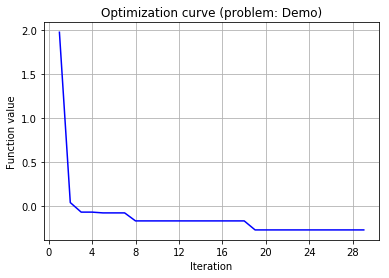

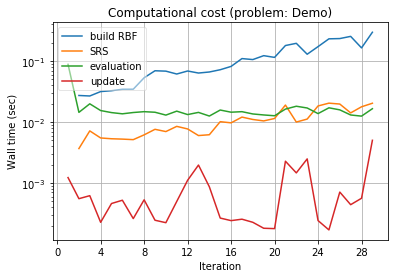

In [11]:
# Visualize optimization results
optimizer.visualize(select=['optim_curve', 'time']) # optimization curve and computational costs of different components

In [12]:
# Perform posterior evaluations
n_top = 100 # use top 100 points as the candidates for the posterior best point
n_repeat = 100 # number of Monte Carlo repeats
optimizer.posterior_eval(n_top=n_top, n_repeat=n_repeat) # run posterior Monte Carlo evaluations

Running posterior evaluations (n_point = 100, n_repeat = 100) .......... Done (time took: 6.83e-01 sec).


In [13]:
# Get optimization results after posterior evaluations
best_point = optimizer.post_best_x # best point found (the one with the lowest Monte Carlo mean estimate)
best_value = optimizer.post_best_y # best value found (the Monte Carlo mean estimate for 'optimizer.post_best_x')
top_pt, top_mean_val, top_std_val, _ = optimizer.post_top_pts(n_top=10) # top 10 points in terms of Monte Carlo mean estimates
print('Best point: %s' % str(best_point))
print('Best (mean) value: %g' % best_value)
print('')
print('Top 10 points based on posterior evaluations:')
print(top_pt)
print('')
print('Function mean estimates for the top 10 points:')
print(top_mean_val)
print('')
print('Function standard deviation estimates for the top 10 points:')
print(top_std_val)

Best point: [-0.00398517  0.01883326]
Best (mean) value: -0.0168467

Top 10 points based on posterior evaluations:
[[-0.00398517  0.01883326]
 [ 0.05279403 -0.00990112]
 [ 0.00052515  0.03982749]
 [ 0.02915636  0.00948164]
 [-0.06761481 -0.03397404]
 [ 0.02357704  0.0114009 ]
 [ 0.01590353  0.01303516]
 [-0.0307424   0.02575343]
 [-0.01331379 -0.00396448]
 [-0.02843684 -0.00717304]]

Function mean estimates for the top 10 points:
[-0.01684665 -0.01466399 -0.0105333  -0.00996051 -0.00731349 -0.00713064
 -0.00673901 -0.00671296 -0.00552519 -0.00497546]

Function standard deviation estimates for the top 10 points:
[0.10381988 0.09683088 0.10059095 0.10887525 0.11301054 0.08824575
 0.09977132 0.0930354  0.09865721 0.09959396]


In [14]:
# Display the same results more compactly using 'show' method
optimizer.show(select=['post_result'], n_top=10)

Posterior evaluation results:
- Condition: run ProSRS algorithm for 29 iterations, then run posterior evaluations with 100 Monte Carlo repeats
- Best point:
  x = -0.00398517, y = 0.0188333
- Best (mean) value:
  z = -0.0168467
- Top 10 points sorted by Monte Carlo mean estimates (Column 3):
               x             y     mean of z    std of z
     -0.00398517     0.0188333    -0.0168467     0.10382
        0.052794   -0.00990112     -0.014664   0.0968309
     0.000525153     0.0398275    -0.0105333    0.100591
       0.0291564    0.00948164   -0.00996051    0.108875
      -0.0676148     -0.033974   -0.00731349    0.113011
        0.023577     0.0114009   -0.00713064   0.0882457
       0.0159035     0.0130352   -0.00673901   0.0997713
      -0.0307424     0.0257534   -0.00671296   0.0930354
      -0.0133138   -0.00396448   -0.00552519   0.0986572
      -0.0284368   -0.00717304   -0.00497546    0.099594
